<a href="https://colab.research.google.com/github/julianovale/lean_6_sigma_python/blob/master/0003_capabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de capabilidade do processo

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes = True)

In [2]:
capa = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/capa.xlsx?raw=true")

In [3]:
capa.head()

,Parameter,USL,LSL
0,44.974,45.0,44.5
1,45.066,NaN,NaN
2,44.944,NaN,NaN
3,45.088,NaN,NaN
4,44.951,NaN,NaN


In [4]:
LSE = 45 # limite superior da especificação
LIE = 44.5 # limite inferior da especificação

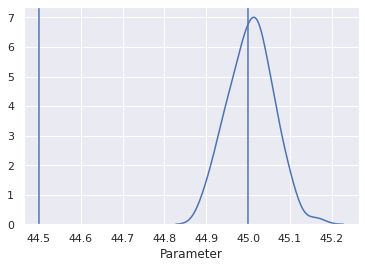

In [21]:
sns.distplot(capa.Parameter, hist = False)
plt.axvline(x=LSE)
plt.axvline(x=LIE)

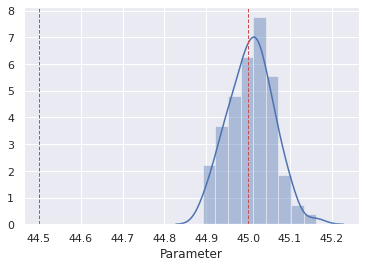

In [22]:
sns.distplot(capa.Parameter, color = 'b')
plt.axvline(x=LSE, ls = "--", linewidth = 1, color = 'r')
plt.axvline(x=LIE, ls = "--", linewidth = 1, color = 'r')

## Calculando o score sigma


In [7]:
capa.describe()

,Parameter,USL,LSL
count,90.000000,1.0,1.0
mean,45.006567,45.0,44.5
std,0.053430,NaN,NaN
min,44.892000,45.0,44.5
25%,44.974750,45.0,44.5
50%,45.011000,45.0,44.5
75%,45.042250,45.0,44.5
max,45.163000,45.0,44.5


In [8]:
Cp = (LSE-LIE)/(6*capa.Parameter.std())
Cp

1.5596607419996131

In [9]:
Cps = (LSE-capa.Parameter.mean())/(3*capa.Parameter.std())
Cps

-0.04096708882317563

In [10]:
Cpi = (capa.Parameter.mean()-LIE)/(3*capa.Parameter.std())
Cpi

3.160288572822402

In [11]:
Cpk = min(Cps, Cpi)
Cpk

-0.04096708882317563

## Interpretação
- Cp e Cpk < 1,33: O processo está num índice inadequado, necessitando de inspeção 100%
- Cp >= 1,33 e Cpk < 1,33: O processo está em um índice satisfatório, aplicando inspeção por amostragem
- Cp e Cpk >= 1,33: O processo está em um índice bastante satisfatório, não necessitando inspeção

# Outro exemplo:
- Notas de 40 alunos numa matéria na universidade

In [12]:
capa1 = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/notas.xlsx?raw=true")

In [13]:
capa1.head()

,notas
0,7.7
1,2.6
2,5.2
3,5.7
4,8.8


In [14]:
LSE1 = 10 # limite superior da especificação
LIE1 = 4.99 # limite inferior da especificação

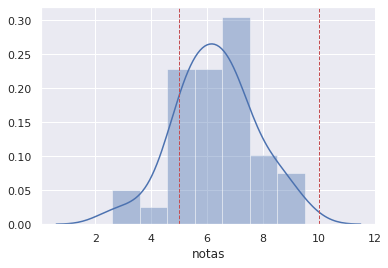

In [23]:
sns.distplot(capa1.notas, color = 'b')
plt.axvline(x=LSE1, ls = "--", linewidth = 1, color = 'r')
plt.axvline(x=LIE1, ls = "--", linewidth = 1, color = 'r')

In [16]:
Cp1 = (LSE1-LIE1)/(6*capa1.notas.std())
Cp1

0.578127975320664

In [17]:
Cps1 = (LSE1-capa1.notas.mean())/(3*capa1.notas.std())
Cps1

0.8562294564629394

In [18]:
Cpi1 = (capa1.notas.mean()-LIE1)/(3*capa1.notas.std())
Cpi1

0.30002649417838845

In [19]:
Cpk1 = min(Cps1, Cpi1)
Cpk1

0.30002649417838845

### Resultado e interpretação
- Cp e Cpk menores que 1,33, o processo necessita ser melhorado